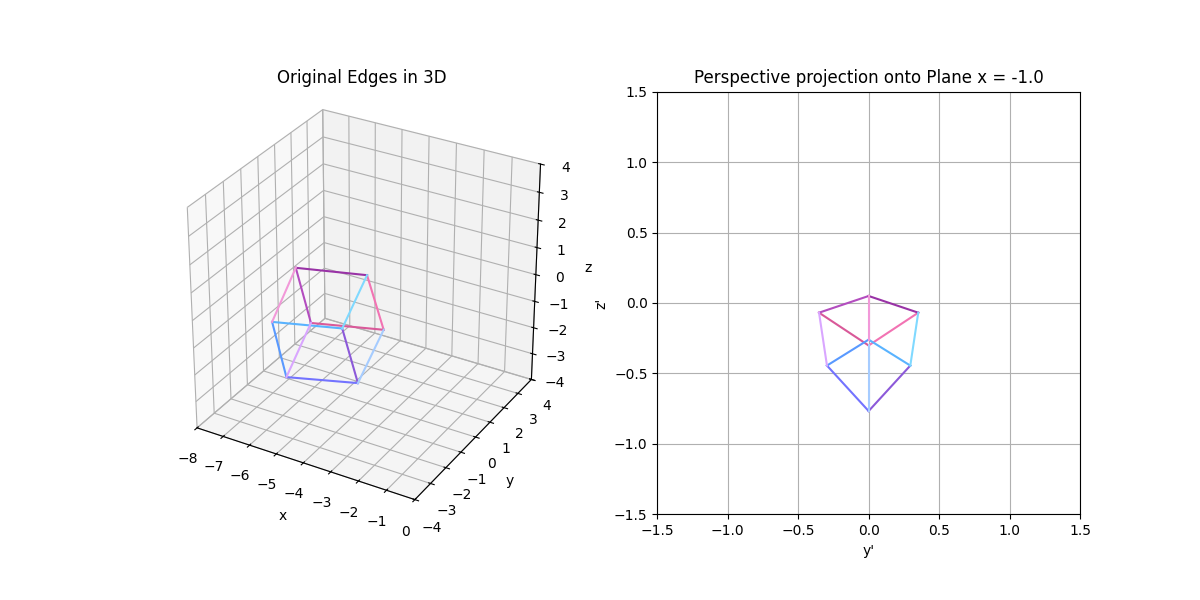

In [31]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

def generate_cube(center, euler_angles, size=1.0):
    """generates 12 edges of a cube given center, euler_angles (z, y, x), and size"""
    s = size / 2.0
    local_vertices = np.array([
        [-s, -s, -s],
        [ s, -s, -s],
        [ s,  s, -s],
        [-s,  s, -s],
        [-s, -s,  s],
        [ s, -s,  s],
        [ s,  s,  s],
        [-s,  s,  s]
    ])
    rotation = R.from_euler('zyx', euler_angles)
    rotated_vertices = rotation.apply(local_vertices)
    global_vertices = rotated_vertices + center
    edge_indices = [
        (0, 1), (1, 2), (2, 3), (3, 0),
        (4, 5), (5, 6), (6, 7), (7, 4),
        (0, 4), (1, 5), (2, 6), (3, 7)
    ]
    edges = [(global_vertices[i], global_vertices[j]) for i, j in edge_indices]
    return edges

def central_project_point(P, plane_point, plane_normal):
    '''projection of point P to the plane defined by point and normal (in our case x=-1)'''
    plane_normal = plane_normal / np.linalg.norm(plane_normal)
    denom = np.dot(plane_normal, P)
    if denom == 0:
        return None
    t = np.dot(plane_normal, plane_point) / denom
    return t * P

def project_line_from_two_points(P0, P1, plane_point, plane_normal):
    """projection of two points and drawing line between them"""
    Q0 = central_project_point(P0, plane_point, plane_normal)
    Q1 = central_project_point(P1, plane_point, plane_normal)
    if Q0 is None or Q1 is None:
        return np.empty((3, 0))
    return np.linspace(Q0, Q1, 100).T

# Projection plane  x = a (we look from the (0,0) point, and it is our "canvas")
a = -1.0
proj_plane_point = np.array([a, 0.0, 0.0])
proj_plane_normal = np.array([1.0, 0.0, 0.0])

# Parameters for cube (Here you put center of the cube and rotation angle!)
center = np.array([-5.5, 0.0, -1.5])
euler_angles = (np.pi/4 , -np.pi/8 , np.pi)  # (alpha, beta, gamma)
edges = generate_cube(center, euler_angles, size=2.5)

# Project all cube edges
projections = [project_line_from_two_points(p0, p1, proj_plane_point, proj_plane_normal) for p0, p1 in edges]

# Colors for edges
colors = [
    (0.95, 0.45, 0.7),   
    (0.85, 0.35, 0.6),   
    (0.7, 0.3, 0.75),    
    (0.6, 0.2, 0.65),    
    (0.55, 0.35, 0.85),  
    (0.45, 0.45, 1.0),   
    (0.35, 0.6, 1.0),    
    (0.35, 0.7, 1.0),    
    (0.5, 0.85, 1.0),    
    (0.65, 0.8, 1.0),    
    (0.85, 0.65, 1.0),  
    (0.95, 0.6, 0.85)   
]

# Plots
fig = plt.figure(figsize=(12, 6))

# 3D plot of the initial cube
ax1 = fig.add_subplot(121, projection='3d')
for (p0, p1), color in zip(edges, colors):
    ax1.plot([p0[0], p1[0]], [p0[1], p1[1]], [p0[2], p1[2]], color=color)
ax1.set_title("Original Edges in 3D")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.set_xlim(-8, 0)
ax1.set_ylim(-4, 4)
ax1.set_zlim(-4, 4)
ax1.set_box_aspect([1, 1, 1])

# Projection: how it looks with perspective
ax2 = fig.add_subplot(122)
for proj, color in zip(projections, colors):
    if proj.shape[1] > 0:
        ax2.plot(proj[1], proj[2], color=color)
ax2.set_title(f"Perspective projection onto Plane x = {a}")
ax2.set_xlabel("y'")
ax2.set_ylabel("z'")
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_aspect('equal')
ax2.grid(True)

plt.show()
